In [57]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Correct the file path
df = pd.read_csv(r'C:\Users\astha\Downloads\data.csv')
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Drama",1988.0,tt0094675,7.4,9229.0,NaN
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.4,8058.0,NaN
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2387933.0,NaN
3,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1251509.0,NaN
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,528480.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21899 entries, 0 to 21898
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               21168 non-null  object 
 1   type                21899 non-null  object 
 2   genres              21528 non-null  object 
 3   releaseYear         21859 non-null  float64
 4   imdbId              20261 non-null  object 
 5   imdbAverageRating   20082 non-null  float64
 6   imdbNumVotes        20082 non-null  float64
 7   availableCountries  155 non-null    object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB


In [6]:
df['genres']

0             Comedy, Crime, Drama
1             Comedy, Drama, Music
2                   Drama, Romance
3                            Drama
4        Action, Adventure, Sci-Fi
                   ...            
21894                   Reality-TV
21895           Crime, Documentary
21896    Animation, Crime, Mystery
21897                          NaN
21898        Crime, Drama, Mystery
Name: genres, Length: 21899, dtype: object

In [10]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21894    False
21895    False
21896    False
21897     True
21898    False
Length: 21899, dtype: bool

In [11]:
df.describe()

,releaseYear,imdbAverageRating,imdbNumVotes
count,21859.000000,20082.000000,2.008200e+04
mean,2013.353676,6.400269,3.240904e+04
std,14.329685,1.091582,1.222400e+05
min,1913.000000,1.000000,5.000000e+00
25%,2011.000000,5.700000,3.340000e+02
50%,2018.000000,6.500000,1.619500e+03
75%,2022.000000,7.200000,1.045700e+04
max,2025.000000,9.800000,3.056199e+06


In [13]:
df['releaseYear'] = pd.to_datetime(df['releaseYear'])

print(df['releaseYear'].dtypes)


datetime64[ns]


In [19]:
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Drama",1970.0,tt0094675,7.4,9229.0,NaN
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1970.0,tt0092149,7.4,8058.0,NaN
2,Forrest Gump,movie,"Drama, Romance",1970.0,tt0109830,8.8,2387933.0,NaN
3,American Beauty,movie,Drama,1970.0,tt0169547,8.3,1251509.0,NaN
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1970.0,tt0119116,7.6,528480.0,NaN


In [27]:
# List of columns you want to drop
cols_to_drop = ['type', 'imdbId', 'availableCountries']

# Only keep columns that actually exist in df
existing_cols = [col for col in cols_to_drop if col in df.columns]

# Drop them safely
df.drop(existing_cols, axis=1, inplace=True)

# View remaining columns
print(df.columns)


Index(['title', 'genres', 'releaseYear', 'imdbAverageRating', 'imdbNumVotes'], dtype='object')


In [28]:
df.head()

,title,genres,releaseYear,imdbAverageRating,imdbNumVotes
0,Ariel,"Comedy, Crime, Drama",1970.0,7.4,9229.0
1,Shadows in Paradise,"Comedy, Drama, Music",1970.0,7.4,8058.0
2,Forrest Gump,"Drama, Romance",1970.0,8.8,2387933.0
3,American Beauty,Drama,1970.0,8.3,1251509.0
4,The Fifth Element,"Action, Adventure, Sci-Fi",1970.0,7.6,528480.0


In [ ]:
def catigorize_col(df, col, labels):

    edges = [df[col].describe()['min'],
    df[col].describe()['25%'],
    df[col].describe()['50%'],
    df[col].describe()['75%'],
    df[col].describe()['max']]

    df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates = 'drop')

    return df

In [34]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
catigorize_col(df, 'imdbAverageRating', labels)
df['imdbAverageRating'].unique()

['popular', 'average', 'below_avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [35]:
df.head()

,title,genres,releaseYear,imdbAverageRating,imdbNumVotes
0,Ariel,"Comedy, Crime, Drama",1970.0,popular,9229.0
1,Shadows in Paradise,"Comedy, Drama, Music",1970.0,popular,8058.0
2,Forrest Gump,"Drama, Romance",1970.0,popular,2387933.0
3,American Beauty,Drama,1970.0,popular,1251509.0
4,The Fifth Element,"Action, Adventure, Sci-Fi",1970.0,popular,528480.0


In [36]:
df['imdbAverageRating'].value_counts()

imdbAverageRating
below_avg      5538
average        5136
not_popular    5032
popular        4376
Name: count, dtype: int64

In [37]:
df.dropna(inplace = True)
df.isna().sum()

title                0
genres               0
releaseYear          0
imdbAverageRating    0
imdbNumVotes         0
dtype: int64

In [46]:
df['genres'] = df['genres'].str.split(', ')
df = df.explode('genres').reset_index(drop=True)
print(df)

                  title     genres  releaseYear imdbAverageRating  \
0                 Ariel     Comedy       1970.0           popular   
1                 Ariel      Crime       1970.0           popular   
2                 Ariel      Drama       1970.0           popular   
3   Shadows in Paradise     Comedy       1970.0           popular   
4   Shadows in Paradise      Drama       1970.0           popular   
5   Shadows in Paradise      Music       1970.0           popular   
6          Forrest Gump      Drama       1970.0           popular   
7          Forrest Gump    Romance       1970.0           popular   
8       American Beauty      Drama       1970.0           popular   
9     The Fifth Element     Action       1970.0           popular   
10    The Fifth Element  Adventure       1970.0           popular   
11    The Fifth Element     Sci-Fi       1970.0           popular   

    imdbNumVotes  
0         9229.0  
1         9229.0  
2         9229.0  
3         8058.0  
4      

In [47]:
df['genres'] = df['genres'].astype('category')
df['genres'].dtypes


CategoricalDtype(categories=['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Music',
                  'Romance', 'Sci-Fi'],
, ordered=False, categories_dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              12 non-null     object  
 1   genres             12 non-null     category
 2   releaseYear        12 non-null     float64 
 3   imdbAverageRating  12 non-null     object  
 4   imdbNumVotes       12 non-null     float64 
dtypes: category(1), float64(2), object(2)
memory usage: 892.0+ bytes


In [49]:
df.nunique()

title                5
genres               8
releaseYear          1
imdbAverageRating    1
imdbNumVotes         5
dtype: int64

In [50]:
df.head()

,title,genres,releaseYear,imdbAverageRating,imdbNumVotes
0,Ariel,Comedy,1970.0,popular,9229.0
1,Ariel,Crime,1970.0,popular,9229.0
2,Ariel,Drama,1970.0,popular,9229.0
3,Shadows in Paradise,Comedy,1970.0,popular,8058.0
4,Shadows in Paradise,Drama,1970.0,popular,8058.0


In [ ]:
sns.set_style('whitegride')

In [52]:
df['genres'].describe()


count        12
unique        8
top       Drama
freq          4
Name: genres, dtype: object

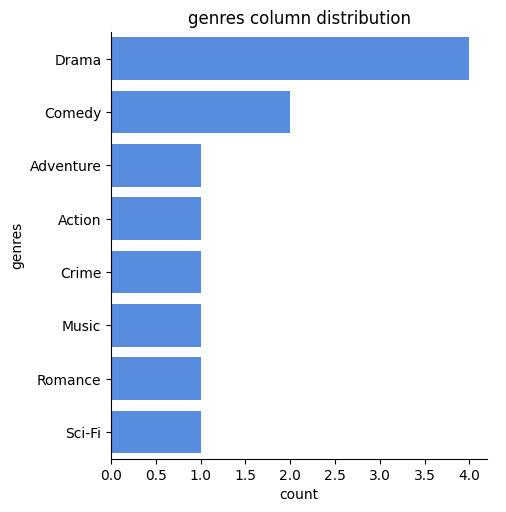

In [59]:

sns.catplot(y = 'genres', data = df, kind = 'count',
            order = df['genres'].value_counts().index,
             color = '#4287f5' )
plt.title('genres column distribution')
plt.show()

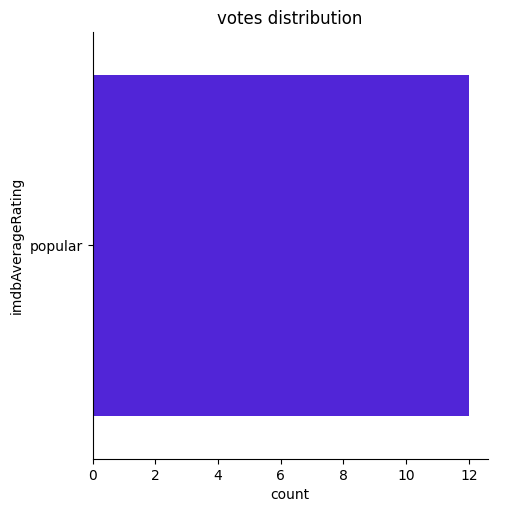

In [61]:
sns.catplot(y = 'imdbAverageRating', data = df, kind = 'count',
            order = df['imdbAverageRating'].value_counts().index,
            color = '#4207f5')
plt.title('votes distribution')
plt.show()